## Практическая работа "ASR Системы"
### Выполнил: Сидельников Дэвид Константинович, группа КЭ-228

Ввиду большого размера исходных файлов, их не получилось загрузить в гитхаб, но команды по работе с ними я оставил!

In [2]:
import subprocess
from pydub import AudioSegment

# Функция для конвертации WebM в WAV
def convert_to_wav(input_file, output_file):
    command = ["ffmpeg", "-i", input_file, output_file]
    subprocess.run(command)

# Конвертация и нарезка
for i in range(1, 6):
    webm_file = f"/Users/davidlimcher/Desktop/Python/nowadays/synthetic_media/practice_2/media/speaker{i}.webm"
    wav_file = f"/Users/davidlimcher/Desktop/Python/nowadays/synthetic_media/practice_2/media/speaker{i}.wav"
    
    # Конвертация в WAV
    convert_to_wav(webm_file, wav_file)
    
    # Нарезка после конвертации
    audio = AudioSegment.from_file(wav_file)
    fragment1 = audio[60000:70000]  # Фрагмент с 60 до 70 сек
    fragment1.export(f"speaker{i}_fragment1.wav", format="wav")
    
    fragment2 = audio[120000:130000]  # Фрагмент с 120 до 130 сек
    fragment2.export(f"speaker{i}_fragment2.wav", format="wav")


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --

In [3]:
import whisperx

# Загрузка модели WhisperX для распознавания
model = whisperx.load_model("large", device="cpu", compute_type="float32")

# Загрузка модели для выравнивания
align_model, metadata = whisperx.load_align_model(language_code="ru", device="cpu")

# Распознавание речи для каждого фрагмента
transcriptions = {}
for i in range(1, 6):
    for j in range(1, 3):
        file_path = f"speaker{i}_fragment{j}.wav"
        
        # Распознавание речи и получение сегментов
        result = model.transcribe(file_path)
        
        # Выравнивание сегментов и получение временных меток
        aligned_result = whisperx.align(result["segments"], align_model, metadata, file_path, device="cpu")
        
        # Вывод структуры aligned_result для анализа
        print(f"Aligned result structure for speaker{i}_fragment{j}: {aligned_result}")
        
        # Если текстовые данные находятся в другом ключе, замените 'text' на нужный ключ
        transcriptions[f"speaker{i}_fragment{j}"] = aligned_result["segments"]  # Исправьте в зависимости от структуры aligned_result
        print(f"Transcription and alignment for speaker{i}_fragment{j}: {aligned_result['segments']}")


No language specified, language will be first be detected for each audio file (increases inference time).


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../../.cache/torch/whisperx-vad-segmentation.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.1.0. Bad things might happen unless you revert torch to 1.x.


Some weights of the model checkpoint at jonatasgrosman/wav2vec2-large-xlsr-53-russian were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at jonatasgrosman/wav2vec2-large-xlsr-53-russian and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
Y

Detected language: ru (1.00) in first 30s of audio...


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker1_fragment1: {'segments': [{'start': 0.209, 'end': 9.029, 'text': ' французская пресса подобрала ему куда более драматический эпитет, отдающий прямо какой-то якобинской цветастостью времён Великой французской революции.', 'words': [{'word': 'французская', 'start': 0.209, 'end': 0.791, 'score': 0.886}, {'word': 'пресса', 'start': 0.851, 'end': 1.212, 'score': 0.806}, {'word': 'подобрала', 'start': 1.232, 'end': 1.733, 'score': 0.861}, {'word': 'ему', 'start': 1.813, 'end': 1.953, 'score': 0.999}, {'word': 'куда', 'start': 2.013, 'end': 2.214, 'score': 0.875}, {'word': 'более', 'start': 2.274, 'end': 2.515, 'score': 0.9}, {'word': 'драматический', 'start': 2.555, 'end': 3.396, 'score': 0.926}, {'word': 'эпитет,', 'start': 3.437, 'end': 4.078, 'score': 0.989}, {'word': 'отдающий', 'start': 4.118, 'end': 4.619, 'score': 0.933}, {'word': 'прямо', 'start': 4.639, 'end': 4.88, 'score': 0.821}, {'word': 'какой-то', 'start': 4.92, 'end': 5.281, 'score': 0.832

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker1_fragment2: {'segments': [{'start': 0.39, 'end': 9.971, 'text': ' требовали ключи шифрования мы готовы уничтожить досье дать вам шанс от вас нужно только одно', 'words': [{'word': 'требовали', 'start': 0.39, 'end': 0.931, 'score': 0.912}, {'word': 'ключи', 'start': 0.991, 'end': 1.372, 'score': 0.899}, {'word': 'шифрования', 'start': 1.432, 'end': 2.535, 'score': 0.907}, {'word': 'мы', 'start': 2.615, 'end': 2.735, 'score': 0.828}, {'word': 'готовы', 'start': 2.775, 'end': 3.216, 'score': 0.965}, {'word': 'уничтожить', 'start': 3.256, 'end': 3.898, 'score': 0.988}, {'word': 'досье', 'start': 3.938, 'end': 5.421, 'score': 0.964}, {'word': 'дать', 'start': 5.501, 'end': 5.782, 'score': 0.915}, {'word': 'вам', 'start': 5.842, 'end': 6.102, 'score': 0.938}, {'word': 'шанс', 'start': 6.223, 'end': 7.746, 'score': 0.959}, {'word': 'от', 'start': 7.786, 'end': 7.946, 'score': 1.0}, {'word': 'вас', 'start': 8.007, 'end': 8.929, 'score': 0.97}, {'word': 'нуж

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker2_fragment1: {'segments': [{'start': 0.61, 'end': 9.189, 'text': ' Но хотя многое известно по телефонным переговорам, по переговорам по радиостанциям между военными, хотя об этом да.', 'words': [{'word': 'Но', 'start': 0.61, 'end': 0.771, 'score': 0.894}, {'word': 'хотя', 'start': 0.831, 'end': 1.152, 'score': 0.93}, {'word': 'многое', 'start': 1.212, 'end': 2.234, 'score': 0.996}, {'word': 'известно', 'start': 2.294, 'end': 2.996, 'score': 0.918}, {'word': 'по', 'start': 3.396, 'end': 4.058, 'score': 0.679}, {'word': 'телефонным', 'start': 4.098, 'end': 4.559, 'score': 0.834}, {'word': 'переговорам,', 'start': 4.579, 'end': 5.22, 'score': 0.905}, {'word': 'по', 'start': 5.261, 'end': 6.143, 'score': 0.994}, {'word': 'переговорам', 'start': 6.183, 'end': 6.604, 'score': 0.728}, {'word': 'по', 'start': 6.624, 'end': 6.684, 'score': 0.368}, {'word': 'радиостанциям', 'start': 6.724, 'end': 7.365, 'score': 0.918}, {'word': 'между', 'start': 7.405, 'end':

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker2_fragment2: {'segments': [{'start': 0.771, 'end': 8.869, 'text': ' Поскольку вооруженные силы Украины, это оперативное командование, созданное для операции конкретно', 'words': [{'word': 'Поскольку', 'start': 0.771, 'end': 1.813, 'score': 0.758}, {'word': 'вооруженные', 'start': 1.853, 'end': 2.334, 'score': 0.853}, {'word': 'силы', 'start': 2.374, 'end': 2.595, 'score': 0.789}, {'word': 'Украины,', 'start': 2.635, 'end': 4.78, 'score': 0.951}, {'word': 'это', 'start': 4.82, 'end': 5.02, 'score': 0.82}, {'word': 'оперативное', 'start': 5.04, 'end': 5.561, 'score': 0.935}, {'word': 'командование,', 'start': 5.601, 'end': 6.223, 'score': 0.942}, {'word': 'созданное', 'start': 6.283, 'end': 6.744, 'score': 0.904}, {'word': 'для', 'start': 6.804, 'end': 7.686, 'score': 0.936}, {'word': 'операции', 'start': 7.746, 'end': 8.367, 'score': 0.641}, {'word': 'конкретно', 'start': 8.408, 'end': 8.869, 'score': 0.976}]}], 'word_segments': [{'word': 'Поскольку',

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker3_fragment1: {'segments': [{'start': 0.089, 'end': 1.332, 'text': ' смотрите в обзоре.', 'words': [{'word': 'смотрите', 'start': 0.089, 'end': 0.51, 'score': 0.914}, {'word': 'в', 'start': 0.55, 'end': 0.59, 'score': 0.501}, {'word': 'обзоре.', 'start': 0.61, 'end': 1.332, 'score': 1.0}]}, {'start': 1.372, 'end': 9.73, 'text': 'Также вышел ролик об аксессуарах для Quest 3, а именно док-станции и удлинителях ручек от', 'words': [{'word': 'Также', 'start': 1.372, 'end': 1.633, 'score': 0.96}, {'word': 'вышел', 'start': 1.673, 'end': 2.314, 'score': 0.962}, {'word': 'ролик', 'start': 2.394, 'end': 2.855, 'score': 0.971}, {'word': 'об', 'start': 2.895, 'end': 3.076, 'score': 1.0}, {'word': 'аксессуарах', 'start': 3.116, 'end': 3.857, 'score': 0.938}, {'word': 'для', 'start': 3.878, 'end': 3.998, 'score': 0.792}, {'word': 'Quest'}, {'word': '3,'}, {'word': 'а', 'start': 4.178, 'end': 4.84, 'score': 0.813}, {'word': 'именно', 'start': 4.9, 'end': 5.281, 's

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker3_fragment2: {'segments': [{'start': 0.229, 'end': 3.096, 'text': ' Oculus Quest 2 до премиальных Valve Index и Vive Pro 2.', 'words': [{'word': 'Oculus'}, {'word': 'Quest'}, {'word': '2'}, {'word': 'до', 'start': 1.111, 'end': 1.512, 'score': 0.736}, {'word': 'премиальных', 'start': 1.572, 'end': 2.555, 'score': 0.892}, {'word': 'Valve'}, {'word': 'Index'}, {'word': 'и', 'start': 2.635, 'end': 3.096, 'score': 0.736}, {'word': 'Vive'}, {'word': 'Pro'}, {'word': '2.'}]}, {'start': 4.399, 'end': 9.991, 'text': 'Диагностика вашего оборудования до ремонта всегда бесплатная, а компания успешно работает как с юридическим', 'words': [{'word': 'Диагностика', 'start': 4.399, 'end': 5.0, 'score': 0.954}, {'word': 'вашего', 'start': 5.04, 'end': 5.361, 'score': 0.889}, {'word': 'оборудования', 'start': 5.381, 'end': 6.002, 'score': 0.977}, {'word': 'до', 'start': 6.062, 'end': 6.163, 'score': 1.0}, {'word': 'ремонта', 'start': 6.203, 'end': 6.604, 'score': 0.81

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker4_fragment1: {'segments': [{'start': 0.009, 'end': 0.49, 'text': ' Как дела?', 'words': [{'word': 'Как', 'start': 0.009, 'end': 0.249, 'score': 0.713}, {'word': 'дела?', 'start': 0.37, 'end': 0.49, 'score': 0.165}]}, {'start': 0.55, 'end': 2.995, 'text': 'Так что будем постараться, но будет непросто.', 'words': [{'word': 'Так', 'start': 0.55, 'end': 0.71, 'score': 0.467}, {'word': 'что', 'start': 0.75, 'end': 1.111, 'score': 0.508}, {'word': 'будем', 'start': 1.131, 'end': 1.372, 'score': 0.406}, {'word': 'постараться,', 'start': 1.412, 'end': 2.193, 'score': 0.479}, {'word': 'но', 'start': 2.213, 'end': 2.253, 'score': 0.0}, {'word': 'будет', 'start': 2.313, 'end': 2.574, 'score': 0.472}, {'word': 'непросто.', 'start': 2.614, 'end': 2.995, 'score': 0.542}]}], 'word_segments': [{'word': 'Как', 'start': 0.009, 'end': 0.249, 'score': 0.713}, {'word': 'дела?', 'start': 0.37, 'end': 0.49, 'score': 0.165}, {'word': 'Так', 'start': 0.55, 'end': 0.71, 'scor

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker4_fragment2: {'segments': [{'start': 0.009, 'end': 9.951, 'text': ' Разыгрываю кучу призов в своей телеге, это 20 аркан, 20 месяцев дота плюс, 40 тысяч фрибетов, все что нужно для участия это перейти по ссылочке в описании, либо по куарку.', 'words': [{'word': 'Разыгрываю', 'start': 0.009, 'end': 0.691, 'score': 0.85}, {'word': 'кучу', 'start': 0.771, 'end': 1.031, 'score': 1.0}, {'word': 'призов', 'start': 1.071, 'end': 1.452, 'score': 0.802}, {'word': 'в', 'start': 1.472, 'end': 1.492, 'score': 0.001}, {'word': 'своей', 'start': 1.532, 'end': 1.833, 'score': 0.998}, {'word': 'телеге,', 'start': 1.893, 'end': 2.615, 'score': 0.975}, {'word': 'это', 'start': 2.655, 'end': 2.775, 'score': 1.0}, {'word': '20'}, {'word': 'аркан,', 'start': 2.935, 'end': 3.557, 'score': 0.895}, {'word': '20'}, {'word': 'месяцев', 'start': 4.078, 'end': 4.339, 'score': 0.634}, {'word': 'дота', 'start': 4.379, 'end': 4.599, 'score': 0.829}, {'word': 'плюс,', 'start': 4.619

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker5_fragment1: {'segments': [{'start': 0.009, 'end': 4.918, 'text': ' Что касается деталей происхождения жизни, мы действительно многого пока еще не знаем.', 'words': [{'word': 'Что', 'start': 0.009, 'end': 0.069, 'score': 0.005}, {'word': 'касается', 'start': 0.089, 'end': 0.43, 'score': 0.925}, {'word': 'деталей', 'start': 0.51, 'end': 1.031, 'score': 0.782}, {'word': 'происхождения', 'start': 1.051, 'end': 1.652, 'score': 0.845}, {'word': 'жизни,', 'start': 1.712, 'end': 2.373, 'score': 0.967}, {'word': 'мы', 'start': 2.433, 'end': 2.494, 'score': 1.0}, {'word': 'действительно', 'start': 2.514, 'end': 2.914, 'score': 0.767}, {'word': 'многого', 'start': 2.954, 'end': 3.275, 'score': 0.917}, {'word': 'пока', 'start': 3.315, 'end': 3.556, 'score': 0.91}, {'word': 'еще', 'start': 3.636, 'end': 3.936, 'score': 0.967}, {'word': 'не', 'start': 3.996, 'end': 4.097, 'score': 0.996}, {'word': 'знаем.', 'start': 4.157, 'end': 4.918, 'score': 0.94}]}, {'start'

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Aligned result structure for speaker5_fragment2: {'segments': [{'start': 0.049, 'end': 6.263, 'text': ' времена у Мейлера и Юрия не было современных приборов, которые могли обнаружить малые концентрации веществ.', 'words': [{'word': 'времена', 'start': 0.049, 'end': 0.951, 'score': 0.93}, {'word': 'у', 'start': 1.011, 'end': 1.071, 'score': 0.957}, {'word': 'Мейлера', 'start': 1.131, 'end': 1.492, 'score': 0.838}, {'word': 'и', 'start': 1.532, 'end': 1.552, 'score': 1.0}, {'word': 'Юрия', 'start': 1.633, 'end': 1.813, 'score': 0.613}, {'word': 'не', 'start': 1.873, 'end': 2.013, 'score': 0.892}, {'word': 'было', 'start': 2.054, 'end': 2.214, 'score': 0.94}, {'word': 'современных', 'start': 2.254, 'end': 2.755, 'score': 0.987}, {'word': 'приборов,', 'start': 2.795, 'end': 3.276, 'score': 0.832}, {'word': 'которые', 'start': 3.316, 'end': 3.617, 'score': 0.923}, {'word': 'могли', 'start': 3.657, 'end': 3.998, 'score': 0.948}, {'word': 'обнаружить', 'start': 4.018, 'end': 4.519, 'score': 

In [4]:
manual_transcriptions = {
    "speaker1_fragment1": "деле французская пресса подобрала ему куда более драматический эпитет отдающий прямо какойто якобинской цветастостью времен великой французской революции",
    "speaker1_fragment2": "требовали ключи шифрования мы готовы уничтожить досье дать вам шанс от вас нужно только одно",
    "speaker2_fragment1": "источников но хотя много известно по телефонным переговорам по переговорам по радиостанциям между военными ходят об этом да",
    "speaker2_fragment2": "то есть поскольку вооруженные силы украины это оперативное командование созданное для операций вот конкретно",
    "speaker3_fragment1": "смотрите в обзоре также вышел ролик об аксессуарах на quest 3 а именно докстанции и удлинителях ручек",
    "speaker3_fragment2": "от oculus quest 2 до премиальных valve index и vive pro 2 диагностика вашего оборудования до ремонта всегда бесплатная а компания успешно работает как с юридическими",
    "speaker4_fragment1": "контрпик меня с кайфом спасибо так что будем стараться но будет непросто",
    "speaker4_fragment2": "разыгрываю кучу призов в своей телеге это 20 аркан 20 месяцев dota plus 40 тысяч фрибетов все что нужно для участия это перейти по ссылке в описании или qrкоду",
    "speaker5_fragment1": "что касается деталей происхождения жизни мы действительно многого еще не знаем но сегодня попробуем разобраться",
    "speaker5_fragment2": "во времена миллера и юри не было современных приборов которые могли обнаружить малые концентрации веществ когда этот эксперимент повторили в 2008 году используя современные",
}


In [5]:
from jiwer import wer, cer

# Данные для хранения значений WER и CER
wer_values = []
cer_values = []
fragments = []

# Цикл по всем фрагментам
for key in transcriptions.keys():
    # Объединяем текст всех сегментов в одну строку
    hypothesis = " ".join([segment['text'] for segment in transcriptions[key]])  # Используем выровненный текст
    reference = manual_transcriptions[key]
    
    # Рассчитываем WER и CER
    wer_value = wer(reference, hypothesis)
    cer_value = cer(reference, hypothesis)
    
    # Добавляем результаты в соответствующие списки
    wer_values.append(wer_value)
    cer_values.append(cer_value)
    fragments.append(key)

    print(f"WER for {key}: {wer_value}")
    print(f"CER for {key}: {cer_value}")


WER for speaker1_fragment1: 0.3333333333333333
CER for speaker1_fragment1: 0.06535947712418301
WER for speaker1_fragment2: 0.0
CER for speaker1_fragment2: 0.0
WER for speaker2_fragment1: 0.3888888888888889
CER for speaker2_fragment1: 0.14634146341463414
WER for speaker2_fragment2: 0.5
CER for speaker2_fragment2: 0.1574074074074074
WER for speaker3_fragment1: 0.4117647058823529
CER for speaker3_fragment1: 0.10891089108910891
WER for speaker3_fragment2: 0.4230769230769231
CER for speaker3_fragment2: 0.07878787878787878
WER for speaker4_fragment1: 0.6666666666666666
CER for speaker4_fragment1: 0.4305555555555556
WER for speaker4_fragment2: 0.3793103448275862
CER for speaker4_fragment2: 0.16981132075471697
WER for speaker5_fragment1: 0.4
CER for speaker5_fragment1: 0.09009009009009009
WER for speaker5_fragment2: 0.375
CER for speaker5_fragment2: 0.1511627906976744


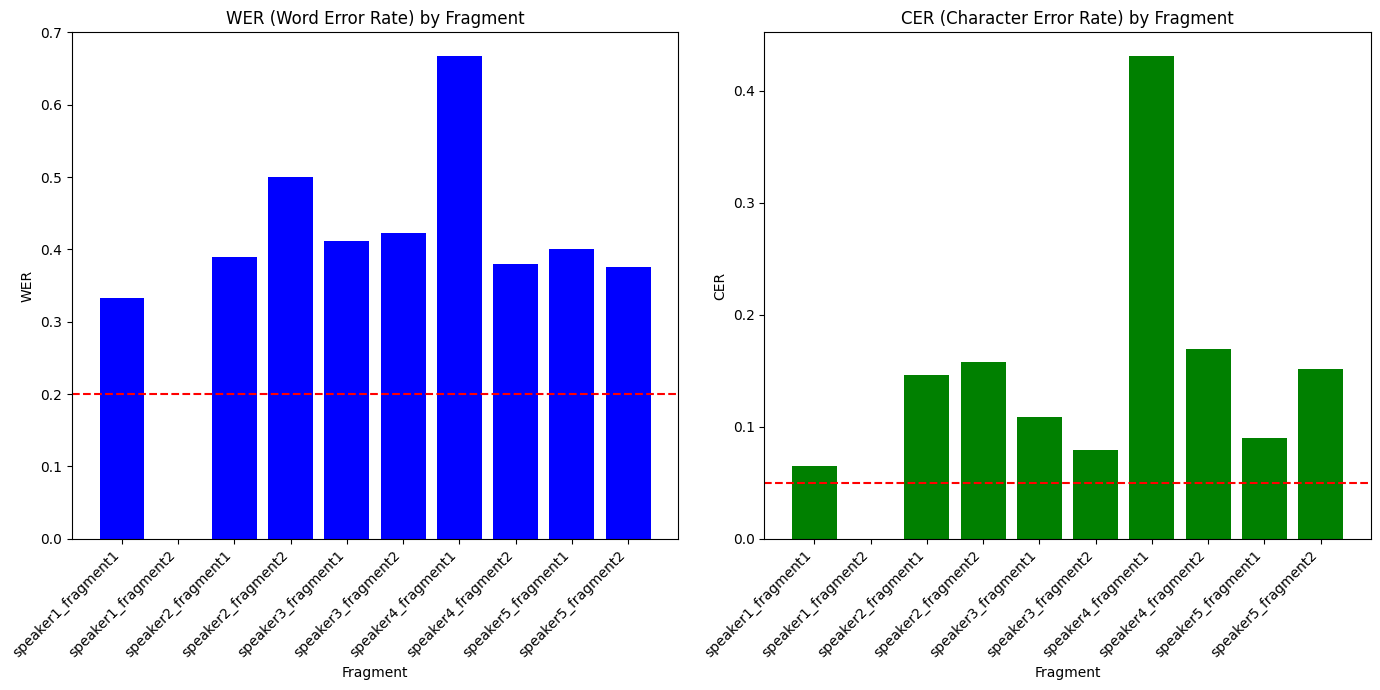

In [6]:
import matplotlib.pyplot as plt

# Создание графиков WER и CER
plt.figure(figsize=(14, 7))

# График для WER
plt.subplot(1, 2, 1)
plt.bar(fragments, wer_values, color='blue')
plt.axhline(y=0.2, color='red', linestyle='--', label='20% WER Threshold')
plt.title('WER (Word Error Rate) by Fragment')
plt.xlabel('Fragment')
plt.ylabel('WER')
plt.xticks(rotation=45, ha='right')

# График для CER
plt.subplot(1, 2, 2)
plt.bar(fragments, cer_values, color='green')
plt.axhline(y=0.05, color='red', linestyle='--', label='5% CER Threshold')
plt.title('CER (Character Error Rate) by Fragment')
plt.xlabel('Fragment')
plt.ylabel('CER')
plt.xticks(rotation=45, ha='right')

# Отображение графиков
plt.tight_layout()
plt.show()


## WER (Word Error Rate)
### Определение: 
WER измеряет процент слов, которые были ошибочно распознаны, пропущены или добавлены в результате распознавания речи. Он рассчитывается как отношение суммы ошибок (замены, вставки, удаления) к общему количеству слов в эталонной транскрипции.

### Формула:
WER = (Количество замен + Количество удалений + Количество вставок) / Общее количество слов в эталоне

### Оптимальные значения:
+ 0% WER: Идеально, но в реальных условиях практически недостижимо.
+ 5-10% WER: Считается хорошим для большинства приложений, таких как голосовые помощники, особенно если речевые команды короткие и структурированные.
+ 10-20% WER: Приемлемо для более сложных задач, таких как транскрипция разговорной речи или речи с сильным акцентом.
+ более 20% WER: Считается высоким и может быть проблематичным для пользовательского опыта, так как большое количество слов будет распознано неправильно.

## CER (Character Error Rate)
### Определение: 
CER измеряет процент символов (букв), которые были ошибочно распознаны, пропущены или добавлены. Этот показатель более детализирован, чем WER, так как учитывает ошибки на уровне символов.
### Формула:
CER = (Количество замен + Количество удалений + Количество вставок) / Общее количество символов в эталоне

### Оптимальные значения:
+ 0% CER: Идеальное распознавание без ошибок.
+ менее 1% CER: Отлично для приложений, где точность на уровне символов критична, например, в системах распознавания текста для юридических документов.
+ 1-5% CER: Хороший уровень для большинства задач, особенно когда точность на уровне символов важна.
+ более 10% CER: Высокий уровень ошибок, который может сильно повлиять на понимание текста.